In [3]:
import datetime as dt  
import pandas as pd
import datetime as dt  	
import numpy as np	  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import random  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 	  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import pandas as pd  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import util as ut  	
import QLearner as ql 
import indicators as ind
from marketsimcode import compute_portvals

symbol="JPM" 	

hsd=dt.datetime(2003, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
hed=dt.datetime(2007, 12, 31)

sd=dt.datetime(2008, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ed=dt.datetime(2009, 12, 31)  

tsd=dt.datetime(2010, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ted=dt.datetime(2011, 12, 31)  
sv=100000 	

In [4]:
from StrategyLearner import StrategyLearner 
from  ManualStrategy import ManualStrategy
from marketsimcode import compute_portvals 
import util as ut  	

import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
def convert_trade(trades, symbol): 
    
    df_trade_strategy = pd.DataFrame(columns=['Date', 'Symbol', 'Order','Shares'])

    for i in range(len(trades)): 

        if trades.iloc[i][0] > 0.0: 
            data = {'Date': trades.index[i], 
                    'Symbol': symbol, 
                    'Order': "BUY", 
                    'Shares': abs(trades.iloc[i][0])}
            df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)
            
        elif trades.iloc[i][0] < 0.0: 
            data = {'Date': trades.index[i], 
                    'Symbol': symbol, 
                    'Order': "SELL", 
                    'Shares': abs(trades.iloc[i][0])}
            
            df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)

    return df_trade_strategy

In [8]:
symbol = 'ML4T-220'
sd=dt.datetime(2008, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ed=dt.datetime(2009, 12, 31)  

tsd=dt.datetime(2010, 1, 1)		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ted=dt.datetime(2011, 12, 31)  

sv = 100000

prices_insample =  ut.get_data([symbol], pd.date_range(sd, ed))[[symbol]]
prices_outsample =  ut.get_data([symbol], pd.date_range(tsd, ted))[[symbol]]

print('start in sample')


## in sample ###
ms = ManualStrategy()
manual_trades = ms.testPolicy(symbol=symbol, sd=sd, ed=ed, sv=sv)
manual_insample = compute_portvals(manual_trades, start_val=sv, commission=0, impact = 0.000, start=sd, end=ed)

print('start q learner')

learner = StrategyLearner(verbose = False, impact = 0.000)
learner.add_evidence(symbol=symbol, sd=sd, ed=ed, sv=sv)

print('start test q learner')

learner_trades = learner.testPolicy(symbol=symbol, sd=sd, ed=ed, sv=sv)
learner_trades = convert_trade(learner_trades, symbol)

learner_insample = compute_portvals(learner_trades, start_val = sv, commission=0, impact=0.000, start=sd, end=ed)

bench_trades = pd.DataFrame(columns=['Date', 'Symbol', 'Order','Shares'])
data = {'Date': prices_insample.index[0], 
    'Symbol': symbol, 
    'Order':'BUY', 
    'Shares':1000}
bench_trades = bench_trades.append(data, ignore_index=True)
bench_insample = compute_portvals(bench_trades, start_val = sv, commission=0, impact=0.000, start=sd, end=ed)


start in sample
start q learner
start test q learner


In [13]:
price = ut.get_data([symbol], pd.date_range(sd, ed))[symbol]

In [17]:
price = price/price[0]

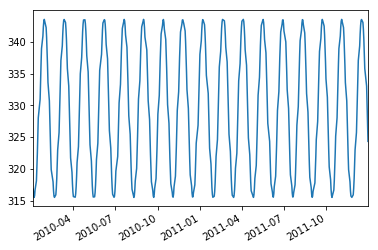

In [9]:
ut.get_data([symbol], pd.date_range(tsd, ted))[symbol]

In [30]:
history = dt.timedelta(100)
full_sd = sd - history
df_price_full = ut.get_data([symbol], pd.date_range(full_sd, ed))
df_price_full = df_price_full[[symbol]]
lookback = 60

In [31]:
sma = ind.price_sma(sd, ed, symbol, lookback, df_price_full)

In [35]:
sma.describe()['sma']['25%']

0.970290491406136

In [36]:
sma = ind.price_sma(sd, ed, symbol, lookback, df_price_full)
sma_stats = sma.describe()
sma_thres = [-np.inf, sma_stats['sma']['25%'], sma_stats['sma']['75%'], np.inf]
sma_state = pd.DataFrame(pd.cut(sma['sma'], bins=sma_thres, labels=[1,2,3])) 

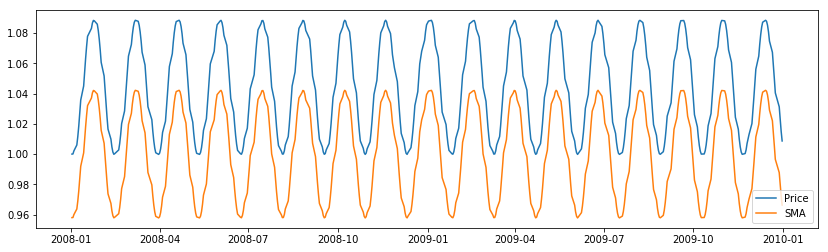

In [29]:
fig, ax = plt.subplots()
ax.plot(price, label='Price')
ax.plot(sma, label="SMA")
ax.legend()
fig.set_figwidth(14)

In [4]:
learner_trades

,Date,Symbol,Order,Shares
0,2008-01-02,JPM,SELL,1000.0
1,2008-01-08,JPM,BUY,1000.0
2,2008-01-09,JPM,SELL,1000.0
3,2008-01-15,JPM,BUY,1000.0
4,2008-01-16,JPM,SELL,1000.0
5,2008-01-29,JPM,BUY,1000.0
6,2008-02-04,JPM,SELL,1000.0
7,2008-03-05,JPM,BUY,1000.0
8,2008-03-11,JPM,SELL,1000.0
9,2008-03-14,JPM,BUY,1000.0


Historical price and vol range 

In [173]:
def get_historical_range(hsd, hed, symbol):
    
    syms = [symbol]  	
    hdates = pd.date_range(hsd, hed) 
    hprices = ut.get_data(syms, hdates)[syms]
    hvol = ut.get_data(syms, hdates, colname='Volume')[syms]
    price_range = hprices.describe()
    vol_range = hvol.describe()

    price_thres = [-np.inf, 
                    price_range[symbol]['25%'], 
                    price_range[symbol]['75%'],  
                    np.inf ]
    
    vol_thres =  [-np.inf, 
                vol_range[symbol]['25%'], 
                vol_range[symbol]['75%'],  
                np.inf ]
    
    return price_thres, vol_thres

In [6]:
def convert_state(row): 
    return (row['price'] - 1) * 9 + (row['vol'] -1) * 3 + (row['bbp'] - 1)

In [4]:
import itertools
x = [1, 2, 3]
possible_states = [p for p in itertools.product(x, repeat=3)]

possible_states = pd.DataFrame(possible_states).rename(columns={0:'price', 1:'vol', 2:'bbp'})
converted_states = pd.DataFrame(possible_states.apply(convert_state, axis=1))

possible_states= pd.concat([possible_states, converted_states], axis=1).rename(columns={0: "state"})

In [177]:
def get_state_change(sd, ed, symbol, price_thres, vol_thres): 

    syms = [symbol]  
    dates = pd.date_range(sd, ed) 

    prices= ut.get_data(syms, dates)[syms]
    vol = ut.get_data(syms, dates, colname='Volume')[syms]

    # price_change = pd.DataFrame(prices[symbol]- prices[symbol].shift(1))
    # price_change = price_change.rename(columns={symbol: 'pct_chg'})
    # price_change = price_change.fillna(0)

    price_data = pd.DataFrame(prices[symbol]).rename(columns={symbol: 'price'})
    prices_state = pd.DataFrame(pd.cut(prices[symbol], bins=price_thres, labels=[1,2,3]))
    vol_state = pd.DataFrame(pd.cut(vol[symbol], bins=vol_thres, labels=[1,2,3]))

    prices_state = prices_state.rename(columns={symbol: 'price'})
    vol_state = vol_state.rename(columns={symbol: 'vol'})


    history = dt.timedelta(100)
    full_sd = sd - history
    df_price_full = ut.get_data([symbol], pd.date_range(full_sd, ed))
    df_price_full = df_price_full[syms]
    lookback = 60 #3 month trading frequency

    bbp = ind.bbp(sd, ed, lookback, df_price_full)
    bbp_thres = [-np.inf,0,1,np.inf]
    bbp_state = pd.DataFrame(pd.cut(bbp['bbp'], bins=bbp_thres, labels=[1,2,3])) 

    observations = pd.concat([prices_state, vol_state, bbp_state], axis=1)
    state = pd.DataFrame(observations.apply(convert_state, axis=1))

    state_price= pd.concat([state, price_data], axis=1).rename(columns={0: "state"})

    return prices, state_price

In [178]:
price_thres, vol_thres = get_historical_range(hsd, hed, 'JPM')

In [179]:
vol_thres

[-inf, 8120175.0, 13404100.0, inf]

In [180]:
test_price, test_data = get_state_change(tsd, ted, 'JPM', price_thres, vol_thres)
train_price, train_data = get_state_change(sd, ed, 'JPM', price_thres, vol_thres)

0 - short 1000 
1 - cash 
2 - long 1000 

In [184]:
def get_reward(price_change, oldpos, a): 
    target_shares = (a - 1)* 1000 
    reward = (target_shares - oldpos) * price_change #TODO: add commission
    return target_shares, reward

In [189]:
def train(state_price, epochs, learner, verbose): 

    scores = np.zeros((epochs, 1))
    for epoch in range(1, epochs + 1): 
        total_reward = 0 
        data = state_price.copy()
 
        i = 0 
        while i < len(state_price) -1: 
            
            state = int(data.iloc[i]['state'])
            today_price = data.iloc[i]['price']

            if i == 0: 
                action = learner.querysetstate(state) # action for first trading day 
            else: 
                action = learner.query(state, reward)

            holding = (action - 1) * 1000 
            trmw_price = data.iloc[i + 1]['price']
            reward = (trmw_price - today_price) * holding
            
            if verbose: 
                print(i)
                print(f"action = {action}")	
                print(f"state = {state}")	
                print(f"reward = {reward}")
            
            total_reward += reward
            i += 1 

        scores[epoch - 1, 0] = total_reward
    return np.median(scores), learner.q

In [190]:
def test(state_price, learner, verbose): 

    startpos = 0

    total_reward = 0 
    data = state_price.copy()
    oldpos = startpos 
    actions_list = []

    i = 0 
    while i < len(state_price) -1: 
        
        state = int(data.iloc[i]['state'])
        action = learner.test_action(state)
        holding = (action - 1) * 1000 
        today_price = data.iloc[i]['price']
        trmw_price = data.iloc[i + 1]['price']
        reward = (trmw_price - today_price) * holding 
       
        actions_list.append(action)

        if verbose: 
            print(i)
            print(f"action = {action}")	
            print(f"state = {state}")	
            print(f"reward = {reward}")
        
        total_reward += reward
        i += 1 

    return total_reward, actions_list

In [191]:
import random as rand 
def test_code(train_data, test_data): 

    rand.seed(903862041)

    learner = ql.QLearner(
        num_states=27, 
        num_actions=3, 
        alpha=0.2, 
        gamma = 0.9, 
        rar = 0.5,
        radr = 0.99, 
        dyna = 200,
        verbose= False
    )

    epochs = 50
    total_reward, policy = train(train_data, epochs, learner, verbose=True)
    test_reward, actions_list  = test(test_data, learner, verbose=False)
    print(f"dyna_score : {total_reward}") 
    print(f"test_score : {test_reward}") 

    return policy, actions_list

In [9]:
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


In [8]:
pd.DataFrame(q_table).join(possible_states).rename(columns={0: "short", 1: "cash", 2:"long"})

,short,cash,long,price,vol,bbp,state
0,0.000000,0.000000,0.000000,1,1,1,0
1,0.000000,0.000000,0.000000,1,1,2,1
2,0.000000,0.000000,0.000000,1,1,3,2
3,0.000000,0.000000,0.000000,1,2,1,3
4,622.937808,0.000000,0.000000,1,2,2,4
5,0.000000,0.000000,0.000000,1,2,3,5
6,227.653309,503.277295,0.000000,1,3,1,6
7,-1455.545841,449.472762,0.000000,1,3,2,7
8,0.000000,0.000000,0.000000,1,3,3,8
9,0.000000,0.000000,0.000000,2,1,1,9


In [63]:
pd.concat([test_price, pd.DataFrame(test_actions).set_index(test_data.index)], axis=1).to_csv("test_check.csv")

In [194]:
df_trade_strategy = pd.DataFrame(columns=['Date', 'Symbol', 'Order','Shares'])

In [199]:
test_actions.append(0)

In [200]:
actions_df = pd.DataFrame(test_actions).set_index(test_data.index)

In [201]:
actions_df = actions_df - 1
trades = (actions_df - actions_df.shift(1)).fillna(actions_df.iloc[0].values[0])
trades = trades * 1000 

In [202]:
trades.head()

,0
2010-01-04,0.0
2010-01-05,0.0
2010-01-06,0.0
2010-01-07,0.0
2010-01-08,0.0


In [203]:
for i in range(len(trades)): 

    if trades.iloc[i][0] > 0.0: 
        data = {'Date': trades.index[i], 
                'Symbol': "JPM", 
                'Order': "BUY", 
                'Shares': abs(trades.iloc[i][0])}
        df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)
        
    elif trades.iloc[i][0] < 0.0: 
        data = {'Date': trades.index[i], 
                'Symbol': "JPM", 
                'Order': "SELL", 
                'Shares': abs(trades.iloc[i][0])}
        
        df_trade_strategy = df_trade_strategy.append(data, ignore_index=True)

In [204]:
df_trade_strategy.head()

,Date,Symbol,Order,Shares
0,2010-01-21,JPM,BUY,1000.0
1,2010-01-22,JPM,SELL,1000.0
2,2010-01-28,JPM,BUY,1000.0
3,2010-01-29,JPM,SELL,1000.0
4,2010-02-01,JPM,BUY,1000.0


In [205]:
from marketsim import compute_portvals

In [206]:
df_trade_benchmark= pd.DataFrame(columns=['Date', 'Symbol', 'Order','Shares'])
data = {'Date': test_data.index[0], 
        'Symbol': "JPM", 
        'Order':'BUY', 
        'Shares':1000}

df_trade_benchmark = df_trade_benchmark.append(data, ignore_index=True)

In [207]:
bench_strategy_port = compute_portvals(df_trade_benchmark, start_val=100000, commission=9.95, impact=0.005, start=tsd, end=ted)
bench_strategy_port = bench_strategy_port/bench_strategy_port[0]

Q_strategy_port = compute_portvals(df_trade_strategy, start_val=100000, commission=9.95, impact=0.005, start=tsd, end=ted)
Q_strategy_port = Q_strategy_port/Q_strategy_port[0]

In [208]:
for i in df_trade_strategy.index:
    print(df_trade_strategy.iloc[i]['Date'])

2010-01-21 00:00:00
2010-01-22 00:00:00
2010-01-28 00:00:00
2010-01-29 00:00:00
2010-02-01 00:00:00
2010-02-04 00:00:00
2010-02-09 00:00:00
2010-02-26 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-04-14 00:00:00
2010-04-16 00:00:00
2010-05-06 00:00:00
2010-05-10 00:00:00
2010-05-13 00:00:00
2010-05-18 00:00:00
2010-05-19 00:00:00
2010-05-20 00:00:00
2010-05-21 00:00:00
2010-05-24 00:00:00
2010-05-25 00:00:00
2010-06-07 00:00:00
2010-06-08 00:00:00
2010-08-02 00:00:00
2010-08-03 00:00:00
2010-11-26 00:00:00
2010-11-29 00:00:00
2010-12-10 00:00:00
2010-12-14 00:00:00
2010-12-22 00:00:00
2010-12-29 00:00:00
2010-12-30 00:00:00
2011-01-07 00:00:00
2011-01-12 00:00:00
2011-01-13 00:00:00
2011-04-06 00:00:00
2011-04-07 00:00:00
2011-05-13 00:00:00
2011-05-17 00:00:00
2011-05-20 00:00:00
2011-05-27 00:00:00
2011-06-01 00:00:00
2011-06-06 00:00:00
2011-06-09 00:00:00
2011-06-13 00:00:00
2011-06-15 00:00:00
2011-07-01 00:00:00
2011-07-06 00:00:00
2011-07-07 00:00:00
2011-07-08 00:00:00


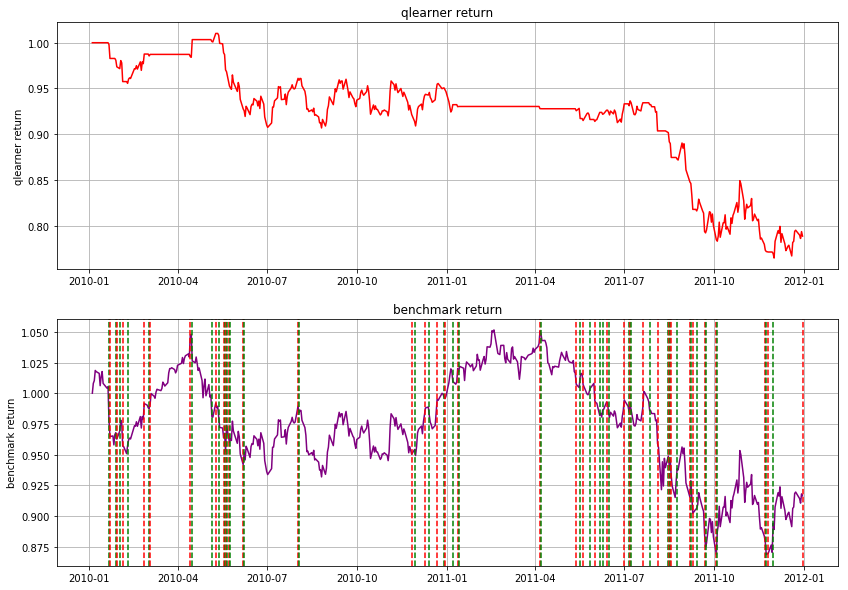

In [209]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(Q_strategy_port, color="red", label="q strategy")
ax[0].set_ylabel('qlearner return')
ax[0].grid()
ax[0].set_title('qlearner return')



ax[1].plot(bench_strategy_port, color="purple", label="benchmark")
ax[1].set_ylabel('benchmark return')
ax[1].set_title('benchmark return')
ax[1].grid()

for i in df_trade_strategy.index:
    if df_trade_strategy.iloc[i]['Order'] == 'BUY':
        ax[1].axvline(x = df_trade_strategy.iloc[i]['Date'], color = 'green', linestyle='--', label='Vertical Line')
    else: 
        ax[1].axvline(x = df_trade_strategy.iloc[i]['Date'], color = 'red', linestyle='--', label='Vertical Line')

fig.set_figwidth(14)

fig.set_figheight(10)
